**Practical 6**

**Regression and Its Types**

**Implement simple linear regression using a dataset.**

**Explore and interpret the regression model coefficients and goodness-of-fit measures.**

**Extend the analysis to multiple linear regression and assess the impact of additional predictors.**

**T114 | Bhumika Shelar**

# **Simple Linear Regression**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
# Get dataset
df = pd.read_csv('/content/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [3]:
# Describe the data
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381693.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000,381692.000000
mean,1.535035,4.179139,1.493355,1.293448,69.920543,4.204274,43.478806,48.962926,2.013351,2.132745,2.121574,2.196640,1.950067,2.179637,2.132159,1.964725,2.126544,2.086046,5.125651,69.972213
std,0.498772,0.683663,0.499956,0.455342,42.967663,15.043958,17.214207,47.505802,3.977422,3.831812,3.871635,4.538664,3.803405,4.707427,3.879371,3.521811,3.864531,3.967368,1.845172,42.895067
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,1.000000,1.000000,97.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,4.000000,2.000000,2.000000,97.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,6.000000,2.000000,2.000000,99.000000,99.000000,119.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


/tmp/ipython-input-1543087018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'])


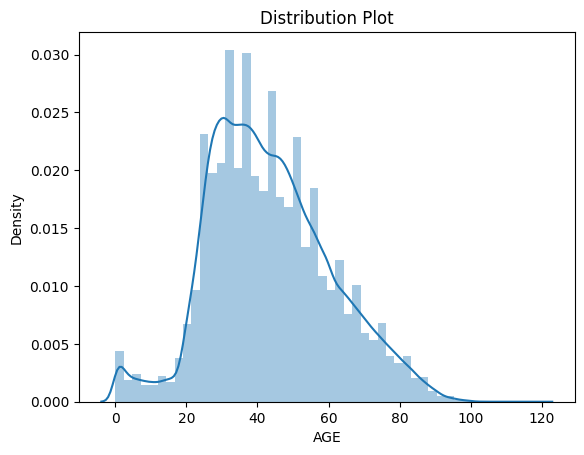

In [4]:
plt.title('Distribution Plot')
sns.distplot(df['AGE'])
plt.show()

**check the relationship between Age and Pneumonia**

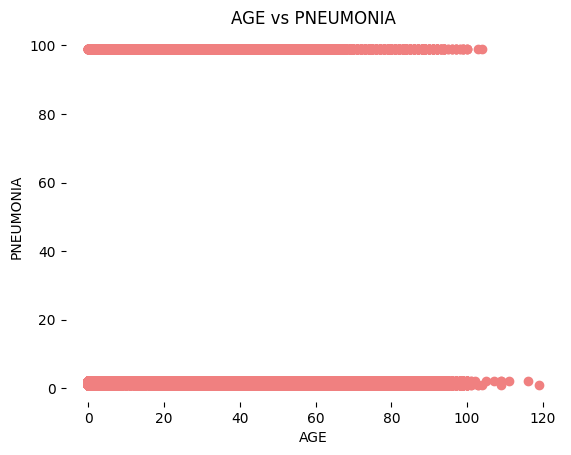

In [5]:
# Relationship between AGE and PNEUMONIA
plt.scatter(df['AGE'], df['PNEUMONIA'], color = 'lightcoral')
plt.title('AGE vs PNEUMONIA')
plt.xlabel('AGE')
plt.ylabel('PNEUMONIA')
plt.box(False)
plt.show()

Split the dataset into dependent/independent variables

In [6]:
# Splitting variables
X = df.iloc[:, :1]  # independent
y = df.iloc[:, 1:]  # dependent

**Split data into Train/Test sets**

In [9]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Train the regression model**

In [8]:
# Regressor model
regressor = LinearRegression()
temp_df = df[['AGE', 'PNEUMONIA']].copy()
temp_df['PNEUMONIA'] = temp_df['PNEUMONIA'].replace(99, np.nan)
temp_df.dropna(inplace=True)
X = temp_df[['AGE']] # Independent variable
y = temp_df['PNEUMONIA'] # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor.fit(X_train, y_train)

LinearRegression()

**Predict the result**


In [10]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

**Plot the training and test results**

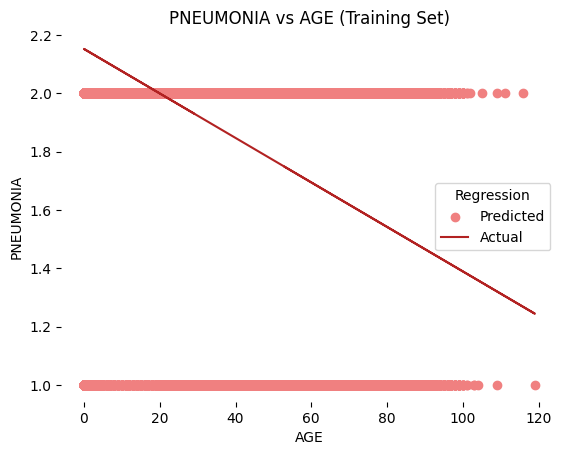

In [11]:
# Prediction on training set
y_pred_train = regressor.predict(X_train)

plt.scatter(X_train, y_train, color='lightcoral')      # Actual values
plt.plot(X_train, y_pred_train, color='firebrick')     # Predicted regression line
plt.title('PNEUMONIA vs AGE (Training Set)')
plt.xlabel('AGE')
plt.ylabel('PNEUMONIA')
plt.legend(['Predicted', 'Actual'], title='Regression', loc='best', facecolor='white')
plt.box(False)
plt.show()

**Plot test set data vs predictions**

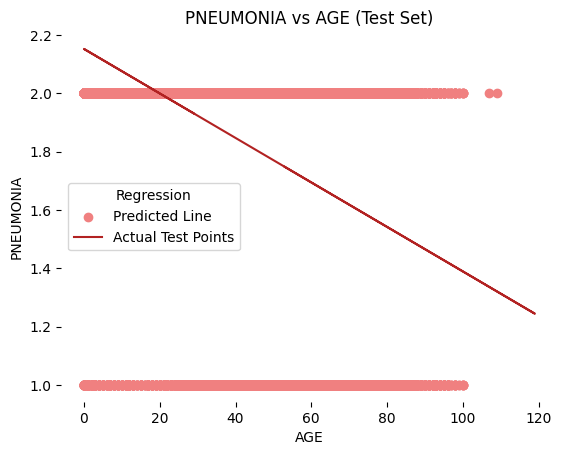

In [12]:
# Prediction on test set
y_pred_test = regressor.predict(X_test)
plt.scatter(X_test, y_test, color='lightcoral')        # Actual test values
plt.plot(X_train, y_pred_train, color='firebrick')     # Regression line from training set
plt.title('PNEUMONIA vs AGE (Test Set)')
plt.xlabel('AGE')
plt.ylabel('PNEUMONIA')
plt.legend(['Predicted Line', 'Actual Test Points'], title='Regression', loc='best', facecolor='white')
plt.box(False)
plt.show()

Linear equation y = mx + c, we can also get the c (y-intercept) and m (slope/coefficient) from the regressor model.

In [13]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [-0.00763227]
Intercept: 2.152558379630382


#**Multiple Linear Regression**

In [15]:
# One-hot encoding for a categorical column, for example, 'SEX'
df_encoded = pd.get_dummies(df, columns=['SEX'], drop_first=True)

In [19]:
df_mlr = df_encoded.copy()
df_mlr['PNEUMONIA'] = df_mlr['PNEUMONIA'].replace(99, np.nan)
df_mlr.dropna(subset=['PNEUMONIA'], inplace=True)


X = df_mlr[['AGE', 'SEX_2']]
y = df_mlr['PNEUMONIA']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predictions
y_pred_train = regressor.predict(X_train)
y_pred_test  = regressor.predict(X_test)

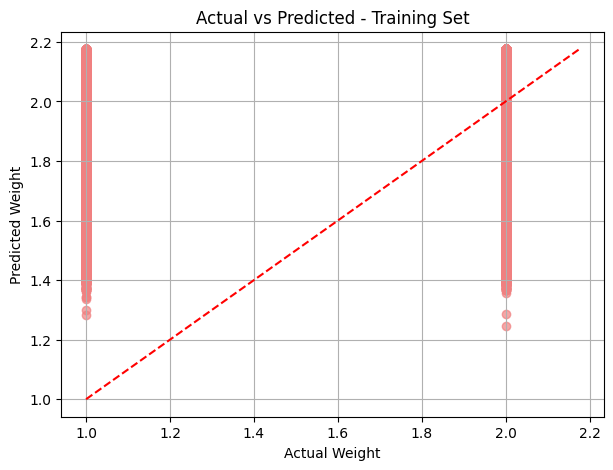

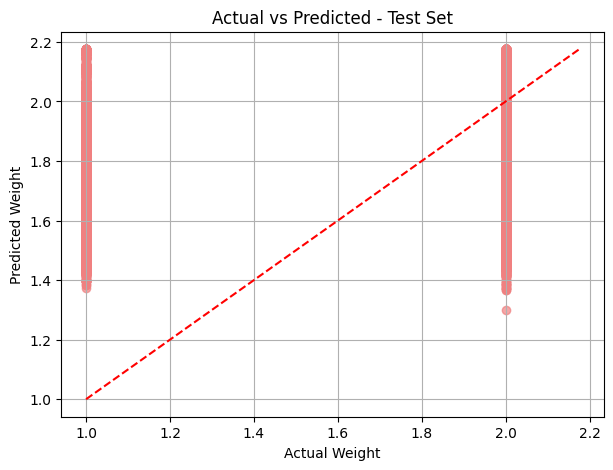

In [21]:
#train set
plt.figure(figsize=(7,5))
plt.scatter(y_train, y_pred_train, alpha=0.7,color='lightcoral')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted - Training Set")
plt.grid(True)
# Plot perfect prediction line
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

# test set
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, color='lightcoral', alpha=0.7)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted - Test Set")
plt.grid(True)
# Perfect prediction reference line
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

In [22]:
# Compare predicted result with actual value
np.set_printoptions(precision=2)
result = np.concatenate((y_pred_test.reshape(len(y_pred_test), 1),
y_test.values.reshape(len(y_test), 1)),axis=1)
result

array([[1.78, 2.  ],
       [1.64, 2.  ],
       [1.9 , 2.  ],
       ...,
       [1.75, 2.  ],
       [1.79, 2.  ],
       [1.78, 2.  ]])